## 使用Requests 存取蘋果列表

In [4]:
import requests
res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
#res.text

## 使用BeautifulSoup 剖析列表

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
DOMAIN = 'http://www.appledaily.com.tw'

for news in soup.select('.rtddt a'):
    title    = news.select('h1')[0].text
    category = news.select('h2')[0].text
    time     = news.select('time')[0].text
    link     = DOMAIN + news['href']
    print(category, time, title, link)

社會 09:42 七旬婦陳屍工寮　疑外力介入致死(0) http://www.appledaily.com.tw/realtimenews/article/local/20170219/1059494/七旬婦陳屍工寮　疑外力介入致死
財經 09:41 禽流感肆虐　富邦人壽推「從寬理賠」(0) http://www.appledaily.com.tw/realtimenews/article/finance/20170219/1059317/禽流感肆虐　富邦人壽推「從寬理賠」
娛樂 09:41 王寶強公開綠帽家醜　嗆出軌妻「把老實人逼...(0) http://www.appledaily.com.tw/realtimenews/article/entertainment/20170219/1059491/王寶強公開綠帽家醜　嗆出軌妻「把老實人逼到極限」
社會 09:37 最強小鴨屁股貼這張　沒人敢停它旁邊(231) http://www.appledaily.com.tw/realtimenews/article/local/20170219/1059495/最強小鴨屁股貼這張　沒人敢停它旁邊
體育 09:36 求教卡布瑞拉　山多瓦恢復左右開攻(25) http://www.appledaily.com.tw/realtimenews/article/sports/20170219/1059493/求教卡布瑞拉　山多瓦恢復左右開攻
體育 09:36 【明星賽】尼克長人波辛吉斯　獲技術挑戰賽...(0) http://www.appledaily.com.tw/realtimenews/article/sports/20170219/1059497/【明星賽】尼克長人波辛吉斯　獲技術挑戰賽冠軍
娛樂 09:34 【驚呆片】愛子公主嬰兒肥蒸發　叛逆期暴瘦...(30490) http://www.appledaily.com.tw/realtimenews/article/entertainment/20170219/1059331/【驚呆片】愛子公主嬰兒肥蒸發　叛逆期暴瘦變紙片人
國際 09:32 美國航母戰鬥群行駛南海　挑動中國緊張神經(61) http://www.appledaily.com.tw/realtimenews/article/internation

## 存取內容頁

In [13]:
detailurl = 'http://www.appledaily.com.tw/realtimenews/article/finance/20170219/1059317/禽流感肆虐　富邦人壽推「從寬理賠」'
res = requests.get(detailurl)
soup = BeautifulSoup(res.text, 'html.parser')

### 抓取標題

In [18]:
title = ' '.join(soup.select('#h1')[0].text.split())
title

'禽流感肆虐 富邦人壽推「從寬理賠」'

### 抓取文章內容

In [22]:
summary = soup.select('#summary')[0].text
summary

'近日H5N6亞型高病原性禽流感拉警報，全台多縣市禽場接連爆出疫情，行政院已成立禽流感中央災害應變中心提高防疫層級。許多民眾擔心疫情若是升溫，感染機會就可能變高，萬一遭受感染，保險是否理賠？富邦人壽表示，針對法定傳染病，富邦人壽的「壽險」與「醫療險」都有理賠，而且從寬認定給付，讓保戶安心。農委會防檢局表示，台灣已有雲林、嘉義、台南等縣市禽場傳出H5N6感染案例，疫情來勢洶洶，不少壽險公司的客服專線都接到民眾來電詢問，萬一遭受感染是否理賠？富邦人壽表示，針對法定傳染病，富邦人壽的「壽險」與「醫療險」均能理賠。即使民眾持有的醫療險為民國87年以前將法定傳染病列為除外責任的舊保單，富邦人壽基於關懷保戶立場從寬給付，依契約條款各項原定給付項目約定負保險責任，提供住院醫療保障。此外，具高傳染力及致死率的H7N9甲型流感病毒目前正在中國肆虐，累計已有16例禽傳人個案、11人死亡，其中以浙江、江蘇兩省疫情最為嚴重，北京、上海、廣東、湖南、河南等地亦有確診病例。由於兩岸往來頻繁，富邦人壽提醒國人如需前往上述地區出差或旅遊，除了投保「旅行平安險」，更別忘加買「海外突發疾病醫療險」附約，才能享有海外醫療理賠的完整保障。同樣的，如保戶在台灣投保，外派至中國工作且在中國境內發生保險事故，也會有當地「熟門熟路」保險業者代為照應。富邦人壽表示，2015年已與中國最大民營壽險公司平安人壽簽訂交換兩岸理賠契約，只要是富邦人壽保戶在中國當地發生保險事故，除了現有的SOS國際救援服務外，也可透過平安人壽協助申請理賠收件服務，突破需回到國內才能申請理賠的限制。（王立德/台北報導）'

### 抓取時間

In [28]:
from datetime import datetime
dt = datetime.strptime(soup.select('.gggs time')[0].text, '%Y年%m月%d日%H:%M')
#type(dt)
dt

datetime.datetime(2017, 2, 19, 9, 41)

#### Strip

In [36]:
a = '       123     456      '
print(a)
print(a.lstrip())
print(a.rstrip())
print(a.strip())

       123     456      
123     456      
       123     456
123     456


### 抓取點閱數

In [39]:
clicked = soup.select('.clicked')[0].text.lstrip('人氣(').rstrip(')')
clicked

'90'

## 正規表達法

In [40]:
phone1 = '0912345678'
phone2 = '0912-345-678'
phone3 = '0912-345678'

In [47]:
import re
#re.match
#re.search

phone1 = '0922339987'
# match 6 
m = re.search('6', phone1)
print(m)

# match 9
m = re.search('9', phone1)
print(m)

# match 6 or 7
m = re.search('[67]', phone1)
print(m)


# match 0 or 1 or 2 or ... 9
m = re.search('[0123456789]', phone1)
print(m)

# [0-9] = [0123456789]
m = re.search('[0-9]', phone1)
print(m)

# \d == [0-9]
m = re.search('\d', phone1)
print(m)

None
<_sre.SRE_Match object; span=(1, 2), match='9'>
<_sre.SRE_Match object; span=(9, 10), match='7'>
<_sre.SRE_Match object; span=(0, 1), match='0'>
<_sre.SRE_Match object; span=(0, 1), match='0'>
<_sre.SRE_Match object; span=(0, 1), match='0'>


In [51]:
name = '小s'

# match s
m = re.search('s', name)
print(m)

# match a or b or c or ... z
m = re.search('[abcdefghijklmnopqrstuvwxyz]', name)
print(m)


# [a-z] = [abcdefghijklmnopqrstuvwxyz]
m = re.search('[a-z]', name)
print(m)

# match a or b or ...z A or B or .... Z
m = re.search('[a-zA-Z]', name)
print(m)

# match a or b or ...z; A or B or .... Z; 0 or 1 or ... 9
m = re.search('[a-zA-Z0-9]', name)
print(m)

# \w = [a-zA-Z0-9]... and any word
m = re.search('\w', name)
print(m)

<_sre.SRE_Match object; span=(1, 2), match='s'>
<_sre.SRE_Match object; span=(1, 2), match='s'>
<_sre.SRE_Match object; span=(1, 2), match='s'>
<_sre.SRE_Match object; span=(1, 2), match='s'>
<_sre.SRE_Match object; span=(1, 2), match='s'>
<_sre.SRE_Match object; span=(0, 1), match='小'>


In [61]:
phone1 = '0922339987'
m = re.search('\d', phone1)
print(m)

# {} - match 10 digit => \d{10}
m = re.search('\d{10}', phone1)
print(m)

# {} - match 3 ~ 5 digit => \d{3  ,  5}
m = re.search('\d{3,5}', phone1)
print(m)

# {} - match 0 ~ infinity digit => \d{0  ,  }
m = re.search('\d{0,}', phone1)
print(m)

# * = {0  ,  }
m = re.search('\d*', phone1)
print(m)

# {} - match 1 ~ infinity digit => \d{1  ,  }
m = re.search('\d{1,}', phone1)
print(m)

# + = {1  ,  }
m = re.search('\d+', phone1)
print(m)

<_sre.SRE_Match object; span=(0, 1), match='0'>
<_sre.SRE_Match object; span=(0, 10), match='0922339987'>
<_sre.SRE_Match object; span=(0, 5), match='09223'>
<_sre.SRE_Match object; span=(0, 10), match='0922339987'>
<_sre.SRE_Match object; span=(0, 10), match='0922339987'>
<_sre.SRE_Match object; span=(0, 10), match='0922339987'>
<_sre.SRE_Match object; span=(0, 10), match='0922339987'>


In [66]:
phones = ['0912345678', '0912-345-678', '0912-345678']
for phone in phones:
    #print(phone)
    #m = re.search('\d{10}', phone)
    #m = re.search('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', phone)
    m = re.search('09\d{2}-?\d{3}-?\d{3}', phone)
    print(m)

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>


In [75]:
m = re.search('人氣\(\d+\)', soup.select('.clicked')[0].text)
print(m.group(0))
#print(m.group(1))

m = re.search('人氣\((\d+)\)', soup.select('.clicked')[0].text)
print(m.group(0))
print(m.group(1))

人氣(90)
人氣(90)
90


In [80]:
email = 'david@largitdata.com'
m = re.search('\w+@\w+', email)
print(m)

m = re.search('\w+@[\w\.]+', email)
print(m)

m = re.search('(\w+)@([\w\.]+)', email)
print(m.group(0))
print(m.group(1)) # match username
print(m.group(2)) # match domain name

<_sre.SRE_Match object; span=(0, 16), match='david@largitdata'>
<_sre.SRE_Match object; span=(0, 20), match='david@largitdata.com'>
david@largitdata.com
david
largitdata.com


## 抓PCHOME

In [88]:
import requests
import re
res = requests.get('http://ecapi.pchome.com.tw/ecshop/prodapi/v2/prod/DYAF55-A9006O6S8-000&store=DYAJ5F&fields=Seq,Id,Name,Nick,Store,PreOrdDate,SpeOrdDate,Price,Discount,Pic,Weight,ISBN,Qty,Bonus,isBig,isSpec,isCombine,isDiy,isRecyclable,isCarrier,isMedical,isBigCart,isSnapUp,isDescAndIntroSync,isFoodContents,isHuge,isEnergySubsidy&_callback=jsonp_prod&1487473920?_callback=jsonp_prod')
m = re.search('try\{jsonp_prod\((.*?)\);\}', res.text)
m.group(1)

'{"DYAF55-A9006O6S8-000":{"Seq":14708038,"Id":"DYAF55-A9006O6S8-000","Name":"cheero\\u963f\\u6123lightning & microUSB \\u5145\\u96fb\\u50b3\\u8f38\\u7dda\\uff1a10\\u516c\\u5206\\/MFi\\u8a8d\\u8b49(Andriod+\\u860b\\u679c\\u5169\\u7528)","Nick":"cheero\\u963f\\u6123lightning & microUSB \\u5145\\u96fb\\u50b3\\u8f38\\u7dda\\uff1a10\\u516c\\u5206\\/MFi\\u8a8d\\u8b49","Store":"DYAP00","PreOrdDate":"","SpeOrdDate":"","Price":{"M":520,"P":520},"Discount":0,"Pic":{"B":"\\/items\\/DYAF55A9006O6S8\\/000001_1478493151.jpg","S":"\\/items\\/DYAF55A9006O6S8\\/000002_1482400120.jpg"},"Weight":0.06,"ISBN":"","Qty":7,"Bonus":0,"isBig":0,"isSpec":0,"isCombine":0,"isDiy":0,"isRecyclable":0,"isCarrier":0,"isMedical":0,"isBigCart":1,"isSnapUp":0,"isDescAndIntroSync":0,"isFoodContents":0,"isHuge":0,"isEnergySubsidy":0}}'

## 抓住商不動產

In [100]:
import requests
import re
res = requests.get('http://www.hbhousing.com.tw/detail/?sn=YS78590')
#print(res.encoding)
res.encoding = 'utf-8'
m = re.search('http://www.hbhousing.com.tw/detail/mapV2.asp\?x=([\d\.]+)&y=([\d\.]+)',res.text)
print(m.group(1), m.group(2))

121.498594 25.134147


## 完整爬蟲流程

### 0. 引用套件

In [101]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import re

### 1. 建立內容抓取函式

In [127]:
def pageDetail(detailurl):
    res     = requests.get(detailurl)
    soup    = BeautifulSoup(res.text, 'html.parser')
    
    title   = ' '.join(soup.select('#h1')[0].text.split())
    summary = ' '.join(soup.select('#summary')[0].text.split())
    dt      = datetime.strptime(soup.select('.gggs time')[0].text, '%Y年%m月%d日%H:%M')
    clicked = 0
    if len(soup.select('.clicked')) > 0:
        m = re.search('人氣\((\d+)\)', soup.select('.clicked')[0].text)
        if m:
            clicked = int(m.group(1))
    return {'title':title, 'summary':summary, 'dt':dt, 'clicked':clicked}

In [108]:
pageDetail('http://www.appledaily.com.tw/realtimenews/article/life/20170219/1044398/%E3%80%90%E8%80%81%E5%B1%8B%E9%A9%9A%E5%A5%87%E7%B3%BB%E5%88%97%E3%80%91%E6%96%87%E9%9D%92%E4%B8%BB%E5%94%B1DIY%E3%80%80%E6%94%B9%E9%80%A0%E5%BB%A2%E5%A2%9F%E8%AE%8A%E5%92%96%E5%95%A1%E5%A4%A9%E5%A0%82')

{'clicked': 264,
 'dt': datetime.datetime(2017, 2, 19, 11, 4),
 'summary': '位於北市木新路與木柵路中間「小廢墟烘培工作室」，過去是一處無人敢靠近的廢工廠，屋內不僅有堆積如山的垃圾、破舊漏水的屋頂，還佈滿動物屍體與灰塵。但對咖啡烘培師洪璽開來說卻看到了不一樣的可能，在他耗時六個月的努力，與朋友獨力完成訂製天花板、接水電、裝潢等工程，曾是木柵一個不起眼的角落，如今已成為一處富有生命的咖啡豆烘培工作室，還獲選「老屋新生大獎」的銀獎。現年35歲的洪璽開，是地下樂團staycool的主唱，過去曾發過兩張專輯，還多次在日本巡迴演出。而在舞台下的他，則是一位專業咖啡烘培師；學生時期就在咖啡店打工並熱愛咖啡的他，30歲開始創業經營咖啡店，為了有個寧靜不干擾他人的烘培坊，他在2015年開始尋找專屬自己的小空間。「來到這裡(木柵)真的是誤打誤撞」，回憶自己找房的過程，洪璽開說自己剛好有位朋友，向他推薦父親修車廠旁的廢工廠，也就是現在的工作室。但他到場後的第一印象，卻是滿地的垃圾與灰塵，甚至還有動物的屍體，當時他第一反應就是「天啊！這怎麼可能有辦法做工作室」。但他走入室內觀看整個空間，發現這座廢工廠「空間結構很有趣」，裡面有個小夾層(樓中樓)，室內採光又很好，讓過去鍾情老房子、老傢俱的他，決定對空間進行大改造。洪說，最後他用「廢墟價」向房東租下這座空間，由於閒置20年，當時房東還打趣的說「租的時候現況租給你，還的時候不能這樣還給我」。回想改造的過程，洪璽開說光是清掉一座很像山的垃圾，就耗掉一個月的時間，接著他開始搭鐵皮、釘木頭天花板，再來接水電，最後裝潢，還給滿是粉塵的牆壁上漆，陸陸續續添加新傢俱、配備，最後一共花了6個月的時間、20萬餘元的預算，生出了現在的小廢墟烘培工作室。談到最困難的過程，洪璽開說實在太多太多，一開始搭鐵皮必須把整個屋頂都拆掉，當時他請了10個朋友來幫忙，務必要在一天內將它完工，沒想到鐵皮搭完僅兩天就遇到大颱風，雖然鐵皮沒被吹走，但「整個空間各式各樣的滴水」，等颱風走後大家又爬上屋頂，補了1、200支螺絲，針對漏水部分補強，才終於大功告成。此外在施工過程中，它也因為碰到金屬原料，導致全身過敏了一個禮拜，另外接水電時，也碰過一打開開關，結果電器電燈直接燒掉。但洪璽開說，整修過程有辛酸也有收穫，

### 2. 從列表頁抓取所有資料

In [128]:
import time
DOMAIN = 'http://www.appledaily.com.tw'

newsary = []
for page in range(1,5):
    res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/{}'.format(page))
    soup = BeautifulSoup(res.text, 'html.parser')
    for news in soup.select('.rtddt a'):
        title    = news.select('h1')[0].text
        category = news.select('h2')[0].text
        time     = news.select('time')[0].text
        link     = DOMAIN + news['href']
        detail   = pageDetail(link)
        detail.update({'category':category, 'link':link})
        newsary.append(detail)
        #time.sleep(1)
    #print(category, time, title, link)

### 3. 將資料轉到Pandas 的DataFrame

In [131]:
import pandas
newspd = pandas.DataFrame(newsary)
newspd.head()

,category,clicked,dt,link,summary,title
0,社會,0,2017-02-19 12:02:00,http://www.appledaily.com.tw/realtimenews/arti...,無辜車主遭鞭炮炸到火燒車！臉書「爆料公社」粉絲團分享網友貼文，地點在台南佳里區，壟香科繞境，...,衰！壟香科繞境放鞭炮 被炸到火燒車
1,生活,0,2017-02-19 12:00:00,http://www.appledaily.com.tw/realtimenews/arti...,油價連二降！台灣中油公司宣布，依浮動油價機制計算，明天20日凌晨零時起，各式汽柴油價格調降0...,油價連二降！明汽柴油均降0.1元
2,社會,0,2017-02-19 11:58:00,http://www.appledaily.com.tw/realtimenews/arti...,苗栗縣聖方濟育幼院去年10月發生摔死院童案，生活輔導員張為瑜情緒管理欠佳，不滿11歲的何姓安...,摔死家暴童 育幼院輔導員判刑5年
3,娛樂,340,2017-02-19 11:57:00,http://www.appledaily.com.tw/realtimenews/arti...,東森財經台主播廖廷娟昨晚氣呼呼到警局備案，原來是有不理性的網友放話要到她的公司堵她！廖廷娟在...,財經美女主播驚遭恐嚇堵人 急奔警局求救！
4,社會,124,2017-02-19 11:55:00,http://www.appledaily.com.tw/realtimenews/arti...,桃園市一名40歲張姓男子，前天上午8時許，騎機車沿桃園區建新街往樹仁三街行駛，行經建新街46...,轉彎未減速禮讓直行車 騎士雙雙倒地


In [134]:
newspd.sort_values(['clicked'], ascending=False).head()

,category,clicked,dt,link,summary,title
119,社會,101641,2017-02-19 07:29:00,http://www.appledaily.com.tw/realtimenews/arti...,還以為是豔遇，結果竟是一場「驚魂記」！《蘋果》即時新聞報導，新北市59歲男子16日在市場欣賞...,艷婦色誘阿伯下藥劫財 素顏落網被害人嚇呆
79,娛樂,90968,2017-02-19 09:34:00,http://www.appledaily.com.tw/realtimenews/arti...,(新增影片)15歲日本愛子公主下月22日將從目前就讀的學習院女子中學畢業，她月初上學途中被跟...,【驚呆片】愛子公主嬰兒肥蒸發 叛逆期暴瘦變紙片人
59,生活,47401,2017-02-19 10:19:00,http://www.appledaily.com.tw/realtimenews/arti...,（新增公路總局長、觀光局長說法）蝶戀花旅行社賞櫻團發生33死11傷的重大車禍，肇事原因檢調單...,【33死】車禍究責！ 觀光局長、公路總局長請辭
40,娛樂,41296,2017-02-19 11:00:00,http://www.appledaily.com.tw/realtimenews/arti...,台視前美女主播張宇，今在臉書宣布已與政大學長男友，Tutor ABC副總裁劉彥谷於2/15日...,【獨家】主播張宇10秒變人妻 閃嫁線上英語教學副總裁
101,國際,39130,2017-02-19 08:20:00,http://www.appledaily.com.tw/realtimenews/arti...,（新增：日本網友看法）北韓最高領導人金正恩的異母哥哥金正男，上周一（13日）在吉隆坡機場遇刺...,【更新】刺殺金正男 印尼女嫌：是「日本人」委託


In [144]:
#select max(clicked), category from newspd group by category
#newspd.groupby(['category'])['clicked'].mean()
#newspd.groupby(['category'])['clicked'].max()

category
副刊        781
國際      39130
地產      12892
壹週刊      4016
娛樂      90968
政治      24808
時尚       1303
生活      47401
社會     101641
論壇       3753
財經      11987
體育      10261
Name: clicked, dtype: int64

In [143]:
idx = newspd.groupby(['category'])['clicked'].transform(max) == newspd['clicked']
#idx
newspd[idx]

,category,clicked,dt,link,summary,title
13,壹週刊,4016,2017-02-19 11:40:00,http://www.appledaily.com.tw/realtimenews/arti...,你是否曾經想過，若是這個世界只有黑白，會是什麼模樣？分布清四季，每天穿的衣服沒什麼好配色，那...,【壹週刊】沒有他！就沒有TIFFANY藍！
37,副刊,781,2017-02-19 11:02:00,http://www.appledaily.com.tw/realtimenews/arti...,許多人出國都會碰到，還沒到住宿check in時間，但是拖著行李又不方便逛街的窘境！現在到東...,50年來新革命！東京推咖啡店寄放行李
41,地產,12892,2017-02-19 10:58:00,http://www.appledaily.com.tw/realtimenews/arti...,新增:影片國際大都會最豪氣的社區，大多位在市區邊緣的山坡上，以無敵景觀、隱密寬敞著稱，如香港...,【有片】比7期還要「豪」 台中比佛利山在這
59,生活,47401,2017-02-19 10:19:00,http://www.appledaily.com.tw/realtimenews/arti...,（新增公路總局長、觀光局長說法）蝶戀花旅行社賞櫻團發生33死11傷的重大車禍，肇事原因檢調單...,【33死】車禍究責！ 觀光局長、公路總局長請辭
79,娛樂,90968,2017-02-19 09:34:00,http://www.appledaily.com.tw/realtimenews/arti...,(新增影片)15歲日本愛子公主下月22日將從目前就讀的學習院女子中學畢業，她月初上學途中被跟...,【驚呆片】愛子公主嬰兒肥蒸發 叛逆期暴瘦變紙片人
91,論壇,3753,2017-02-19 09:00:00,http://www.appledaily.com.tw/realtimenews/arti...,陳明／時事評論者陳庚金日前在「全國公教軍警暨退休人員聯合總會」上的一席話，引起了軒然大波。其...,士農工商齊頭平等的年金制度
98,時尚,1303,2017-02-19 08:40:00,http://www.appledaily.com.tw/realtimenews/arti...,時尚女王Coco Chanel曾說：「不用香水的女人，沒有未來。」1921年，Coco從沙皇...,【時尚圖解】CHANEL N°5的魅惑 Coco女士：搽在妳想被吻的地方
100,政治,24808,2017-02-19 08:22:00,http://www.appledaily.com.tw/realtimenews/arti...,詐騙案件不斷，又有台籍海外詐騙嫌疑犯恐遭遣送到中國。外交部昨證實，去年底西班牙與中國聯手破獲...,涉詐騙案人數屢創新高 西班牙恐遣送200台人赴中
101,國際,39130,2017-02-19 08:20:00,http://www.appledaily.com.tw/realtimenews/arti...,（新增：日本網友看法）北韓最高領導人金正恩的異母哥哥金正男，上周一（13日）在吉隆坡機場遇刺...,【更新】刺殺金正男 印尼女嫌：是「日本人」委託
108,財經,11987,2017-02-19 08:04:00,http://www.appledaily.com.tw/realtimenews/arti...,更新：新增網友意見1937年問世的「撒隆巴斯」（Salonpas）是網傳「去日本一定要買的1...,【日貨不死鳥之二】從肌肉酸貼到肩頸痛 80年撒隆巴斯愈賣愈好


### 4. 將資料存成檔案

In [145]:
newspd.to_clipboard()

In [146]:
newspd.to_csv('news.csv')

In [147]:
newspd.to_excel('news.xlsx')

In [148]:
import pandas
df2 = pandas.read_excel('news.xlsx')
df2.head()

,category,clicked,dt,link,summary,title
0,社會,0,2017-02-19 12:02:00,http://www.appledaily.com.tw/realtimenews/arti...,無辜車主遭鞭炮炸到火燒車！臉書「爆料公社」粉絲團分享網友貼文，地點在台南佳里區，壟香科繞境，...,衰！壟香科繞境放鞭炮 被炸到火燒車
1,生活,0,2017-02-19 12:00:00,http://www.appledaily.com.tw/realtimenews/arti...,油價連二降！台灣中油公司宣布，依浮動油價機制計算，明天20日凌晨零時起，各式汽柴油價格調降0...,油價連二降！明汽柴油均降0.1元
2,社會,0,2017-02-19 11:58:00,http://www.appledaily.com.tw/realtimenews/arti...,苗栗縣聖方濟育幼院去年10月發生摔死院童案，生活輔導員張為瑜情緒管理欠佳，不滿11歲的何姓安...,摔死家暴童 育幼院輔導員判刑5年
3,娛樂,340,2017-02-19 11:57:00,http://www.appledaily.com.tw/realtimenews/arti...,東森財經台主播廖廷娟昨晚氣呼呼到警局備案，原來是有不理性的網友放話要到她的公司堵她！廖廷娟在...,財經美女主播驚遭恐嚇堵人 急奔警局求救！
4,社會,124,2017-02-19 11:55:00,http://www.appledaily.com.tw/realtimenews/arti...,桃園市一名40歲張姓男子，前天上午8時許，騎機車沿桃園區建新街往樹仁三街行駛，行經建新街46...,轉彎未減速禮讓直行車 騎士雙雙倒地


In [150]:
df3 = pandas.read_clipboard(sep=' ', header=None)
df3

,0,1,2
0,社會,0,2017-02-19
1,生活,0,2017-02-19
2,社會,0,2017-02-19
3,娛樂,340,2017-02-19
4,社會,124,2017-02-19
5,社會,889,2017-02-19
6,國際,176,2017-02-19


In [120]:
for page in range(1,7):
    url = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'
    print(url.format(page))

http://www.appledaily.com.tw/realtimenews/section/new/1
http://www.appledaily.com.tw/realtimenews/section/new/2
http://www.appledaily.com.tw/realtimenews/section/new/3
http://www.appledaily.com.tw/realtimenews/section/new/4
http://www.appledaily.com.tw/realtimenews/section/new/5
http://www.appledaily.com.tw/realtimenews/section/new/6


In [151]:
#newsary

### 資料庫基本操作 (I)

In [156]:
import sqlite3 as lite

# 建立連線
conn = lite.connect('test.sqlite')

# 建立游標
cur  = conn.cursor()

# 下SQL
cur.execute('SELECT SQLITE_VERSION()')

# 取得資料
data = cur.fetchone()
print(data)

# 關閉連線
conn.close()

('3.14.2',)


### 資料庫基本操作 (II)

In [157]:
with lite.connect('test.sqlite') as conn:
    # 建立游標
    cur  = conn.cursor()

    # 下SQL
    cur.execute('SELECT SQLITE_VERSION()')

    # 取得資料
    data = cur.fetchone()
    print(data)

('3.14.2',)


### 塞資料到SQLite 中

In [158]:
with lite.connect('test.sqlite') as conn:
    # 建立游標
    cur  = conn.cursor()

    # 下SQL
    cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 


### 取得資料表資料

In [160]:
with lite.connect('test.sqlite') as conn:
    # 建立游標
    cur  = conn.cursor()

    # 下SQL
    cur.execute("SELECT * FROM PhoneAddress") 
    
    data = cur.fetchall()
    print(data)


[('0912173381', 'United State', 'Jhon Doe', 53), ('0928375018', 'Tokyo Japan', 'MuMu Cat', 6), ('0957209108', 'Taipei', 'Richard', 29)]


In [161]:
with lite.connect('test.sqlite') as conn:
    # 建立游標
    cur  = conn.cursor()

    # 下SQL
    cur.execute("SELECT * FROM PhoneAddress") 
    
    data = cur.fetchone()
    print(data)
    
    alldata = cur.fetchall()
    print(alldata)

('0912173381', 'United State', 'Jhon Doe', 53)
[('0928375018', 'Tokyo Japan', 'MuMu Cat', 6), ('0957209108', 'Taipei', 'Richard', 29)]


### 5. 將資料存放到 SQLIte 之中

In [165]:
import sqlite3 as lite
with lite.connect('news.sqlite') as conn:
    newspd.to_sql(name='news', con = conn, if_exists='replace' )

### 6. 從SQLIte 中取得資料

In [166]:
import pandas
with lite.connect('news.sqlite') as conn:
    df = pandas.read_sql_query('SELECT title, clicked FROM news', con=conn)
df.head()

,title,clicked
0,衰！壟香科繞境放鞭炮 被炸到火燒車,0
1,油價連二降！明汽柴油均降0.1元,0
2,摔死家暴童 育幼院輔導員判刑5年,0
3,財經美女主播驚遭恐嚇堵人 急奔警局求救！,340
4,轉彎未減速禮讓直行車 騎士雙雙倒地,124


### 7. 資料視覺化

In [171]:
import pandas
with lite.connect('news.sqlite') as conn:
    df_sum = pandas.read_sql_query(\
        'SELECT category, sum(clicked) as sum_clicked FROM news GROUP BY category', con=conn)
df_sum

,category,sum_clicked
0,副刊,781
1,國際,116713
2,地產,22221
3,壹週刊,4899
4,娛樂,287742
5,政治,33467
6,時尚,2101
7,生活,206072
8,社會,240638
9,論壇,5959


Populating the interactive namespace from numpy and matplotlib


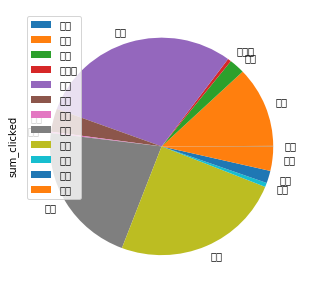

In [186]:
%pylab inline
df_sum.index = df_sum['category']
df_sum.plot(y ='sum_clicked', kind='pie', figsize=[5,5])

### 字典操作

In [109]:
#declare dictionary 
dic = {'a':100, 'b':"yes", 'c':0.98} 
print(dic)

#get keys in dictionary 
print(dic.keys())

#get values in dictionary 
print(dic.values())

#get value of given key 
print(dic['a'])

#get value of given key 
print(dic.get('a'))


{'a': 100, 'b': 'yes', 'c': 0.98}
dict_keys(['a', 'b', 'c'])
dict_values([100, 'yes', 0.98])
100
100


In [110]:
#get value of given key 
print(dic['d'])

KeyError: 'd'

In [113]:
#get value of given key 
print(dic.get('d'))
print(dic.get('d', 'default'))

print(dic.get('a', 'default'))

None
default
100


In [114]:
#add entry into dictionary 
dic['d'] = 'new' 
print(dic) 

#add entry into dictionary 
dic.update({'e':123}) 
print(dic) 

# iter the dictionary 
for rec in dic: 
    print(rec, dic[rec])

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'new'}
{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'new', 'e': 123}
a 100
b yes
c 0.98
d new
e 123


## 抓取網路圖片

In [195]:
import requests

def getImg(url):
    res = requests.get(url)
    with open(url.split('/')[-1], 'wb') as f:
        f.write(res.content)

In [196]:
res = requests.get('http://www.appledaily.com.tw/realtimenews/article/entertainment/20170218/1058299/10%E5%A4%A7%E6%9C%80%E5%BC%B7%E6%97%A5%E6%9C%AC%E7%BE%8E%E5%B0%91%E5%A5%B3%20%E6%A9%8B%E6%9C%AC%E7%92%B0%E5%A5%88%E8%BC%B8%E7%B5%A6%E5%A5%B9%EF%BC%81')
soup = BeautifulSoup(res.text, 'html.parser')
for img_loc  in soup.select('.sglft img'):
    getImg(img_loc['src'])

In [194]:
a = 'http://twimg.edgesuite.net/images/ReNews/20170218/420_331adae1719f1a92552416cf21cad60a.jpg'
a.split('/')[-1]

'420_331adae1719f1a92552416cf21cad60a.jpg'

### Selenium 爬蟲

####  Chromedriver
- https://chromedriver.storage.googleapis.com/2.27/chromedriver_win32.zip

In [199]:
# -*- coding: utf-8 -*-
from selenium import webdriver
import unittest, time, re

driver = webdriver.Chrome()
driver.implicitly_wait(30)
base_url = "https://statementdog.com/"

driver.get(base_url + "/users/sign_in")
driver.find_element_by_id("user_email").clear()
driver.find_element_by_id("user_email").send_keys("kaikouu@easy.com")
driver.find_element_by_id("user_password").clear()
driver.find_element_by_id("user_password").send_keys("123456")
driver.find_element_by_css_selector("button.submit-btn").click()

## 中華民國證券投資信託暨顧問商業同業公會

In [204]:
import requests
from bs4 import BeautifulSoup

payload = {
'ctl00$ContentPlaceHolder1$Type':'radAll',
'ctl00$ContentPlaceHolder1$ddlArea':'',
'ctl00$ContentPlaceHolder1$ddlCurrency':'',
'ctl00$ContentPlaceHolder1$ddlMonth':'201701',
'ctl00$ContentPlaceHolder1$btnQuery':'查詢'   
}

rs = requests.session()
res = rs.get('http://www.sitca.org.tw/ROC/Industry/IN3201.aspx?pid=IN3211')
soup = BeautifulSoup(res.text, 'html.parser')
for inp in soup.select('input[type==hidden]'):
    #print(inp['name'])
    payload[inp['name']] = inp['value']

In [206]:
res2 = rs.post('http://www.sitca.org.tw/ROC/Industry/IN3201.aspx?pid=IN3211', data = payload)
dfs = pandas.read_html(res2.text)

In [216]:
df = dfs[4]
# 使用第0列作為欄位名稱
df.columns = df.ix[0]
# 丟棄第 0 列
df = df.drop(0)

In [218]:
df.to_excel('201701.xlsx')

In [227]:
from datetime import datetime, timedelta
currentdate = datetime.now()
for i in range(1,10):
    dt = ((currentdate - timedelta(days=i * 30)).strftime('%Y%m'))
    payload['ctl00$ContentPlaceHolder1$ddlMonth'] = dt
    res2 = rs.post('http://www.sitca.org.tw/ROC/Industry/IN3201.aspx?pid=IN3211', data = payload)
    dfs = pandas.read_html(res2.text)
    df = dfs[4]
    # 使用第0列作為欄位名稱
    df.columns = df.ix[0]
    # 丟棄第 0 列
    df = df.drop(0)
    df.to_excel('{}.xlsx'.format(dt))

## 鉅亨網商品期貨新聞

In [248]:
from datetime import datetime, timedelta
import time
currenttime = datetime.now()
int(time.mktime(currenttime.timetuple()))
    
dt = datetime.strptime('2017-02-01','%Y-%m-%d')
int(time.mktime(dt.timetuple()))
daybefore = currenttime - timedelta(days = 30)
int(time.mktime(daybefore.timetuple()))

1484900177

In [254]:
import requests
import pandas
currenttime = datetime.now()
endat       = int(time.mktime(currenttime.timetuple()))

daybefore = currenttime - timedelta(days = 30)
startat   = int(time.mktime(daybefore.timetuple()))

dfall = []
page = 1
res = requests.get('http://news.cnyes.com/api/v3/news/category/precious_metals?startAt={}&endAt={}&limit=30'.format(startat, endat, page))
query_res = res.json()
dfall.append(pandas.DataFrame(query_res['items']['data']))

lastpage = query_res['items']['last_page']
for page in range(2,lastpage + 1):
    res = requests.get('http://news.cnyes.com/api/v3/news/category/precious_metals?startAt={}&endAt={}&limit=30'.format(startat, endat, page))
    query_res = res.json()
    dfall.append(pandas.DataFrame(query_res['items']['data']))


In [258]:
dffinal = pandas.concat(dfall)
dffinal.to_excel('gold.xlsx')

## 統一超商資料

In [288]:
import requests
from bs4 import BeautifulSoup
payload ={
'commandid':'GetTown',
'cityid':'01',
'isDining':'False',
'isParking':'False',
'isLavatory':'False',
'isATM':'False',
'is7WiFi':'False',
'isIce':'False',
'isHotDog':'False',
'isHealthStations':'False',
'isIceCream':'False',
'isOpenStore':'False',
'isFruit':'False',
'isCityCafe':'False',
'isUp':'False',
'isOrganic':'False',
'isCorn':'False',
'isMakeUp':'False',
'isMuji':'False',
'isMD':'False',
'isStarBucks':'False',
'isIbon':'False',
'isTea':'False',
'isSweetPotato':'False'    
}
res  = requests.post('https://emap.pcsc.com.tw/EMapSDK.aspx', data = payload)
soup = BeautifulSoup(res.text,'html.parser')

for geo in soup.select('geoposition'):
    #print(geo.select('townid')[0].text, geo.select('townname')[0].text)
    getStoreData(geo.select('townname')[0].text)

In [287]:
import requests
payload2 = {
'commandid':'SearchStore',
'city':'台北市',
'town':'大安區',
'roadname':'',
'ID':'',
'StoreName':'',
'SpecialStore_Kind':'',
'isDining':'False',
'isParking':'False',
'isLavatory':'False',
'isATM':'False',
'is7WiFi':'False',
'isIce':'False',
'isHotDog':'False',
'isHealthStations':'False',
'isIceCream':'False',
'isOpenStore':'False',
'isFruit':'False',
'isCityCafe':'False',
'isUp':'False',
'isOrganic':'False',
'isCorn':'False',
'isMakeUp':'False',
'isMuji':'False',
'isMD':'False',
'isStarBucks':'False',
'isIbon':'False',
'isTea':'False',
'isSweetPotato':'False',
'address':''
}

geodata = []
def getStoreData(area):
    payload2['town'] = area
    res = requests.post('https://emap.pcsc.com.tw/EMapSDK.aspx', data = payload2)
    soup = BeautifulSoup(res.text,'html.parser')
    #print(res.text)

    for geo in soup.select('geoposition'):
        dic = {}
        for item in geo.contents:
            dic[item.name] =  item.text
        geodata.append(dic)

In [289]:
df = pandas.DataFrame(geodata)
df['x'] = df['x'].map(lambda e : float(e)/ 1000000)
df['y'] = df['y'].map(lambda e : float(e)/ 1000000)
df.to_excel('seven.xlsx')